In [1]:
import pandas as pd
import numpy as np
import torchvision
import tensorflow

Epoch [1/5], Loss: 0.1497
Epoch [2/5], Loss: 0.0699
Epoch [3/5], Loss: 0.0474
Epoch [4/5], Loss: 0.0349
Epoch [5/5], Loss: 0.1058
Test Accuracy: 98.85%


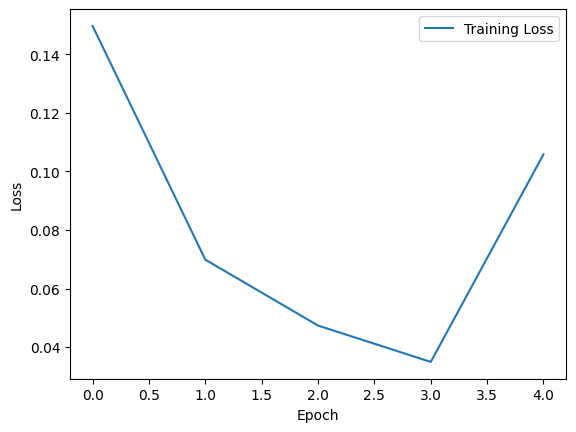

In [6]:
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet50
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
   transforms.ToTensor(), transforms.Resize((28, 28)),  transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])]) 


train_data = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_data = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

if torch.cuda.is_available():
    device = torch.device('cuda')
    print('cu')
else:
    device = torch.device('cpu')
    print('cpu')

model = resnet50(pretrained=True) 
model.fc = nn.Linear(2048, 10)
model = model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 5
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)


        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [8]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet50
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
all_preds = []
all_labels = []

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
   transforms.ToTensor(), transforms.Resize((28, 28)),  transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])]) 


train_data = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_data = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

if torch.cuda.is_available():
    device = torch.device('cuda')
    print('cu')
else:
    device = torch.device('cpu')
    print('cpu')

model = resnet50(pretrained=True) 
model.fc = nn.Linear(2048, 10)
model = model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 5
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)


        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
accuracy = 100 * correct / total

print(f"Test Accuracy: {accuracy:.2f}%")

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


cpu


C:\Users\Andris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Andris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/5], Loss: 0.1508
Epoch [2/5], Loss: 0.0743
Epoch [3/5], Loss: 0.0797
Epoch [4/5], Loss: 0.0427
Epoch [5/5], Loss: 0.0388
Test Accuracy: 99.18%
Precision: 0.9918
Recall: 0.9918


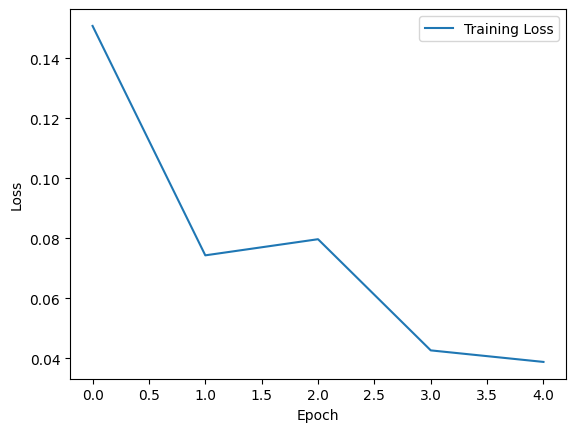

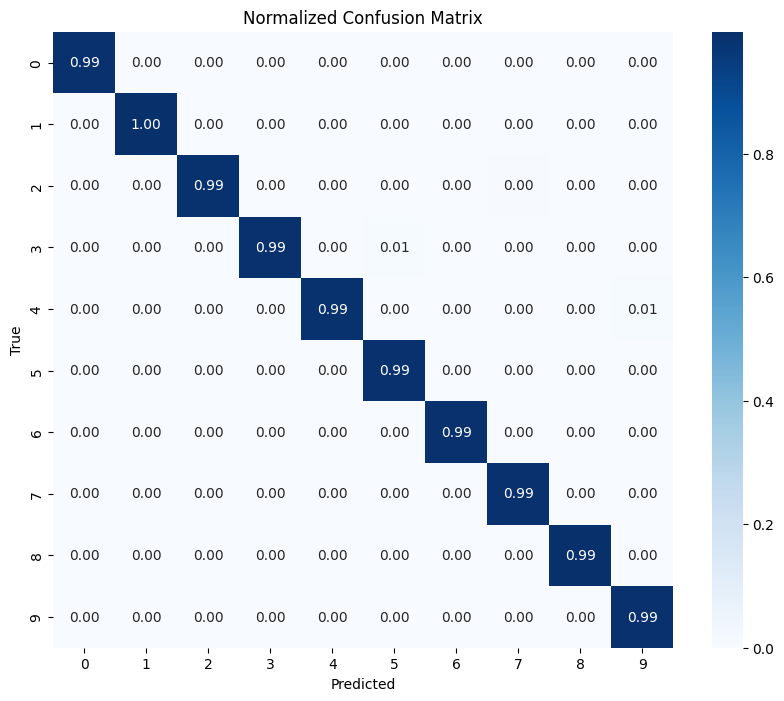

Most confused pairs (true, predicted, confusion score):
[(4, 9, 0.009164969450101833), (3, 5, 0.007920792079207921), (2, 7, 0.0048449612403100775), (7, 3, 0.0038910505836575876), (5, 3, 0.0033632286995515697)]


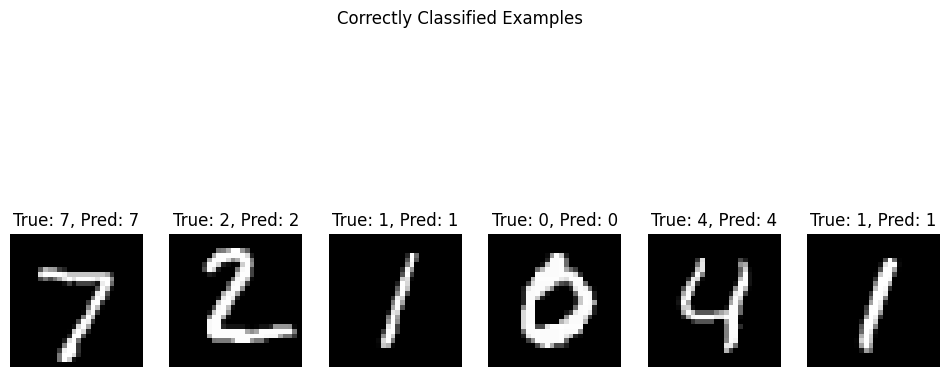

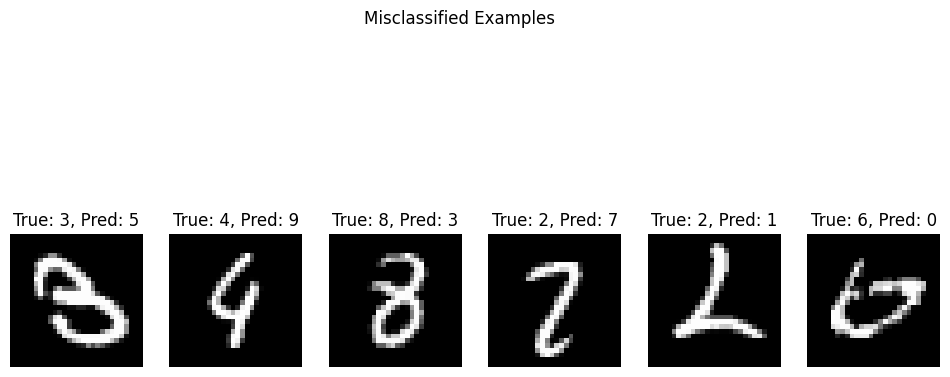

In [9]:
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

cm = confusion_matrix(all_labels, all_preds)
normalized_cm = cm / cm.sum(axis=1, keepdims=True)
plt.figure(figsize=(10, 8))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

most_confused = []
for i in range(10):  
    for j in range(10):  
        if i != j:  
            most_confused.append((i, j, normalized_cm[i, j]))


most_confused.sort(key=lambda x: x[2], reverse=True)
print("Most confused pairs (true, predicted, confusion score):")
print(most_confused[:5])
                            


def show_images(images, labels, preds, title, n=6):
    plt.figure(figsize=(12, 6))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        img = images[i].permute(1, 2, 0).cpu().numpy() 
        img = (img - img.min()) / (img.max() - img.min()) 
        plt.imshow(img)
        plt.title(f"True: {labels[i]}, Pred: {preds[i]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()


correct = []
misclassified = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        for i in range(len(labels)):
            if labels[i] == predicted[i]:
                correct.append((images[i].cpu(), labels[i].item(), predicted[i].item()))
            else:
                misclassified.append((images[i].cpu(), labels[i].item(), predicted[i].item()))

n_samples = 6
correct_images, correct_labels, correct_preds = zip(*correct[:n_samples])
misclass_images, misclass_labels, misclass_preds = zip(*misclassified[:n_samples])

show_images(correct_images, correct_labels, correct_preds, "Correctly Classified Examples")
show_images(misclass_images, misclass_labels, misclass_preds, "Misclassified Examples")